# Лабораторная работа №2
## Филимонова Ирина(15-АС)
## Вариант 28
### glass
### 3 – линейный классификатор (персептрон)
### 4 – логический классификатор (бинарное решающее дерево)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import interp
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (auc, roc_curve, 
                             precision_recall_curve, 
                             average_precision_score)

from sklearn import datasets
from sklearn.linear_model import perceptron
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from matplotlib.pylab import rc, plot

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
glass = pd.read_csv(r'2_glass/glass.csv', sep=',')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт)

 * RI - Показатель преломления
 * Na - Натрий (процент веса, аттрибуты от 4 до 10)
 * Mg - Магний
 * Al - Алюминий
 * Si - Кремний
 * K - Калий
 * Ca - Кальций
 * Ba - Барий
 * Fe - Железо
 * Типы стекла:  
     - 1 - термополированное строительное стекло 
     - 2 - нетермополированное строительное стекло 
     - 3 - термополированное автомобильное стекло
     - 4 - нетермополированное автомобильное стекло
     - 5 - контейнеры
     - 6 - посуда
     - 7 - фары

In [3]:
glass.shape

(214, 10)

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


## 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
glass = glass.drop_duplicates()
glass.shape

(213, 10)

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
RI      213 non-null float64
Na      213 non-null float64
Mg      213 non-null float64
Al      213 non-null float64
Si      213 non-null float64
K       213 non-null float64
Ca      213 non-null float64
Ba      213 non-null float64
Fe      213 non-null float64
Type    213 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


## 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

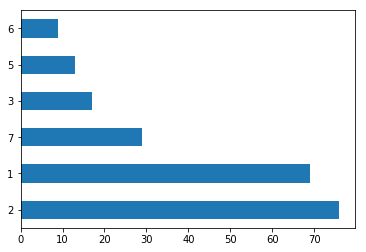

In [7]:
glass['Type'].value_counts().plot.barh()
plt.show()

## 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

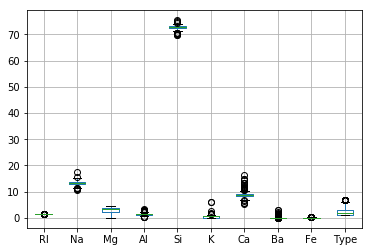

In [8]:
glass.boxplot()
plt.show()

In [9]:
#Отдeлим числовые признаки от категориальных (не учитывая первый и последний столбец, 
#т.к первый показывает дату (она никак не учавстсвует в нашей выборке), а последний класс и его нельзя маштабировать)
from sklearn.preprocessing import MinMaxScaler
numerical_columns = [i for i in glass.columns[1:6] if glass[i].dtype.name != 'object']
categorial_columns = [i for i in glass.columns[1:6] if glass[i].dtype.name == 'object']
#произведем нормализацию числовых признаков
scaler = MinMaxScaler()
glass[numerical_columns] = scaler.fit_transform(glass[numerical_columns])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,0.437594,1.000000,0.252336,0.351786,0.009662,8.75,0.0,0.0,1
1,1.51761,0.475188,0.801782,0.333333,0.521429,0.077295,7.83,0.0,0.0,1
2,1.51618,0.421053,0.790646,0.389408,0.567857,0.062802,7.78,0.0,0.0,1
3,1.51766,0.372932,0.821826,0.311526,0.500000,0.091787,8.22,0.0,0.0,1
4,1.51742,0.381955,0.806236,0.295950,0.583929,0.088567,8.07,0.0,0.0,1


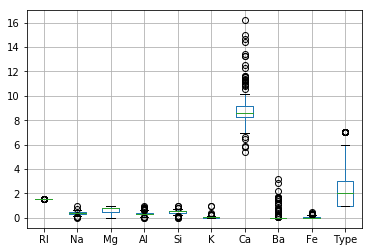

In [10]:
glass.boxplot()
plt.show()

## 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

Type, по сути, является категориальным классом, т.к. числовое значение просто соответствует названию, но у нас он уже представлен количественным.

## 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации) 

In [11]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,0.437594,1.000000,0.252336,0.351786,0.009662,8.75,0.0,0.0,1
1,1.51761,0.475188,0.801782,0.333333,0.521429,0.077295,7.83,0.0,0.0,1
2,1.51618,0.421053,0.790646,0.389408,0.567857,0.062802,7.78,0.0,0.0,1
3,1.51766,0.372932,0.821826,0.311526,0.500000,0.091787,8.22,0.0,0.0,1
4,1.51742,0.381955,0.806236,0.295950,0.583929,0.088567,8.07,0.0,0.0,1


In [12]:
corr_matrix = glass.corr()
sns.heatmap(corr_matrix);

In [13]:
corr_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


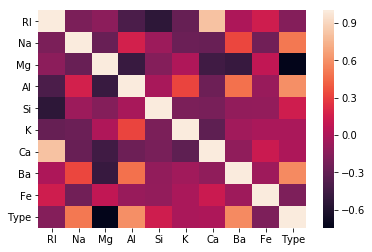

In [14]:
plt.show()

## 7.	Заполните пропущенные значения в данных

In [15]:
glass.shape

(213, 10)

In [16]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
RI      213 non-null float64
Na      213 non-null float64
Mg      213 non-null float64
Al      213 non-null float64
Si      213 non-null float64
K       213 non-null float64
Ca      213 non-null float64
Ba      213 non-null float64
Fe      213 non-null float64
Type    213 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


## 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию

In [17]:
# разделим полученные данные на данные для обучения и теста
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

print(X_train.shape)
print(X_test.shape)

(149, 9)
(64, 9)


In [18]:
# Дерево
dtc = DecisionTreeClassifier()
X, y = glass.drop('Type', axis=1), glass['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
params = {'max_depth': list(range(1,10)), 'max_features': list(range(1,10))}

dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (X_train, y_train)

best_features = dtc_grid.best_estimator_.max_features
best_depth = dtc_grid.best_estimator_.max_depth
best_score = dtc_grid.best_score_
print('best train score:', best_score,)
print('at features number:', best_features,)
print('at depth:', best_depth)

dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(X_train, y_train)
best_score  = np.mean(y_test == dtc.predict(X_test))
print('test score: ', best_score)

best train score: 0.7114093959731543
at features number: 4
at depth: 8
test score:  0.671875


In [20]:
from sklearn.linear_model import Perceptron
slf = Perceptron()
#найдем оптимальные параметры для классификатора
#alfa - Константа, которая умножает член регуляризации
#max_iter - Максимальное количество проходов над данными обучения (иначе говоря, эпохи)
paramsearch = GridSearchCV(estimator=slf, param_grid=dict(alpha=np.linspace(0,1,20)[1:],max_iter=[x for x in range(1,50)]), n_jobs=-1)
paramsearch.fit(X_train, y_train)
best_score = paramsearch.best_score_
selected_alpha = paramsearch.best_estimator_.alpha
selected_max_iter = paramsearch.best_estimator_.max_iter
print('best score:',best_score)
print('alpha:',selected_alpha)
print('max_iter:', selected_max_iter)

#создаем модель персептрона по нашим оптимальным данным
perceptron = sk.linear_model.Perceptron(alpha=selected_alpha,max_iter=selected_max_iter)
#тренируем ее
perceptron.fit(X_train, y_train)
#смотрим в каком проценте случаев классификатор дает верный результат
test_score  = np.mean(y_test == perceptron.predict(X_test))
print('test score: ', test_score)

best score: 0.4697986577181208
alpha: 0.0526315789474
max_iter: 39
test score:  0.546875


In [21]:
from sklearn.calibration import CalibratedClassifierCV
plt.figure(figsize=(10,8))
y_test_invers = []
for i, y in enumerate(y_test.reset_index(drop=True)):
    y_test_invers.append(1-y)
    
probas_dtc = dtc.fit(X_train, y_train).predict_proba(X_test)

#Откалибруем линейный классификатор
#cv - кратность перекрестной проверки
#method - метод калибровки, так как у нас записей больше 1000 то рекомендуется использовать isotonic
#         если же данных << 1000 то sigmoid
clf_isotonic = CalibratedClassifierCV(perceptron, cv=5, method='isotonic')
clf_isotonic.fit(X_train, y_train)
probas_slf = clf_isotonic.predict_proba(X_test)

## 9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы 

Точность логического классификатора ~0.71, Линейного классификатора ~0.46: классификаторы имеют приблизительно одинаковые показатели качества. Однако, данные классификаторы слабо решают задачу предсказания класса с вероятностью ~0.46-0.71. Задача классификации была решена, но по-прежнему есть пути улучшения результата: подобрать более подходящий под задачу классификатор, осуществить несколько иной подход к подготовке данных в соответсвие с выбранным классификатором.